In [ ]:
pip install rocketpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 111 kB 5.2 MB/s 
     |████████████████████████████████| 52 kB 1.6 MB/s 
     |████████████████████████████████| 4.6 MB 41.1 MB/s 
     |████████████████████████████████| 45.7 MB 1.4 MB/s 
     |████████████████████████████████| 1.6 MB 41.8 MB/s 
     |████████████████████████████████| 1.1 MB 43.1 MB/s 
  Created wheel for simplekml: filename=simplekml-1.3.6-py3-none-any.whl size=65876 sha256=e67ad03437638d2df4fbde6eb5febeb3ee6141f4566dccb27cbf01b840fcf775
  Stored in directory: /root/.cache/pip/wheels/5c/ec/e6/10af1a1fb29ffca95151d4c886d6e06fc309c68f46519892de
Successfully built simplekml
  Attempting uninstall: netCDF4
    Found existing installation: netCDF4 1.6.1
    Uninstalling netCDF4-1.6.1:
      Successfully uninstalled netCDF4-1.6.1


In [ ]:
from rocketpy import HybridMotor, Environment, Rocket, Flight

Launch Site Details

Launch Rail Length: 5.2  m
Launch Date: 2022-11-03 12:00:00 UTC
Launch Site Latitude: 32.99025°
Launch Site Longitude: -106.97500°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 315468.64 W    3651938.65 N
Launch Site UTM zone: 13S
Launch Site Surface Elevation: 1471.5 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 78.700 km
Forecast Time Period: From  2022-11-02 00:00:00  to  2022-11-18 00:00:00  UTC
Forecast Hour Interval: 3  hrs
Forecast Latitude Range: From  -90.0 ° To  90.0 °
Forecast Longitude Range: From  0.0 ° To  359.75 °


Surface Atmospheric Conditions

Surface Wind Speed: 6.08 m/s
Surface Wind Direction: 205.25°
Surface Wind Heading: 25.25°
Surface Pressure: 850.32 hPa
Surface Temperature: 285.07 K
Surface Air Density: 1.039 kg/m³
Surface Speed of Sound: 338.47 m/s


Atmospheric Model Plots


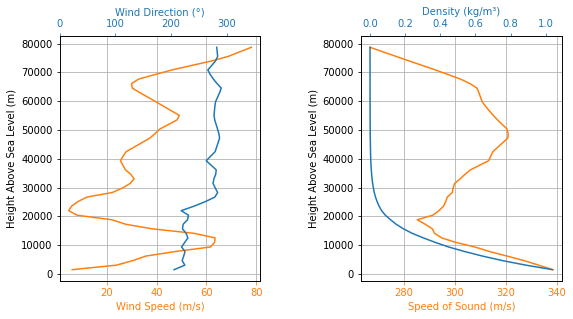

In [ ]:
Env = Environment(
    railLength=5.2, latitude=32.990254, longitude=-106.974998, elevation=1400
)

import datetime

tomorrow = datetime.date.today() + datetime.timedelta(days=1)

Env.setDate((tomorrow.year, tomorrow.month, tomorrow.day, 12))  # Hour given in UTC time

Env.setAtmosphericModel(type="Forecast", file="GFS")

Env.info()

In [ ]:
Pro75M1670 = HybridMotor(
    thrustSource="./Cesaroni_8429M2020-P.eng",
    burnOut=3.9,
    grainNumber=5,
    grainSeparation=5 / 1000,
    grainDensity=1815,
    grainOuterRadius=33 / 1000,
    grainInitialInnerRadius=15 / 1000,
    grainInitialHeight=120 / 1000,
    nozzleRadius=33 / 1000,
    throatRadius=11 / 1000,
    interpolationMethod="linear",
)
Pro75M1670.info()

TypeError: ignored

In [ ]:
Calisto = Rocket(
    motor=Pro75M1670,
    radius=127 / 2000,
    mass=19.197 - 2.956,
    inertiaI=6.60,
    inertiaZ=0.0351,
    distanceRocketNozzle=-1.255,
    distanceRocketPropellant=-0.85704,
    powerOffDrag=1,
    powerOnDrag=1,
)

Calisto.setRailButtons([0.2, -0.5])


Inertia Details
Rocket Mass: 16.241 kg (No Propellant)
Rocket Mass: 19.197 kg (With Propellant)
Rocket Inertia I: 6.600 kg*m2
Rocket Inertia Z: 0.035 kg*m2

Geometrical Parameters
Rocket Maximum Radius: 0.0635 m
Rocket Frontal Area: 0.012668 m2

Rocket Distances
Rocket Center of Mass - Nozzle Exit Distance: -1.255 m
Rocket Center of Mass - Motor reference point: -0.85704 m
Rocket Center of Mass - Rocket Loaded Center of Mass: -0.132 m

Aerodynamic Components Parameters
Currently not implemented.

Aerodynamics Lift Coefficient Derivatives
Nose Cone Lift Coefficient Derivative: 2.000/rad
Fins Lift Coefficient Derivative: 5.603/rad
Tail Lift Coefficient Derivative: -1.061/rad

Aerodynamics Center of Pressure
Nose Cone Center of Pressure to CM: 0.999 m
Fins Center of Pressure to CM: -1.084 m
Tail Center of Pressure to CM: -1.223 m
Distance - Center of Pressure to CM: -0.425 m
Initial Static Margin: 2.306 c
Final Static Margin: 3.345 c

Mass Plots


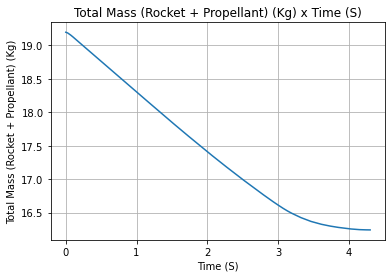

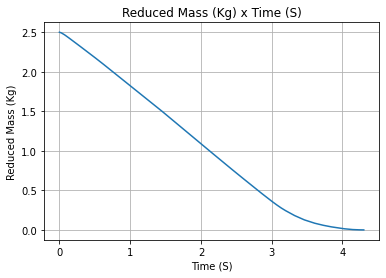


Aerodynamics Plots


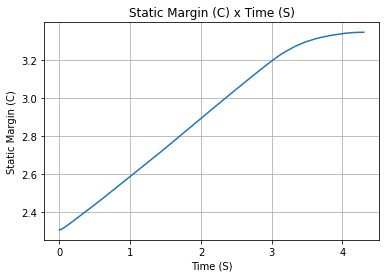

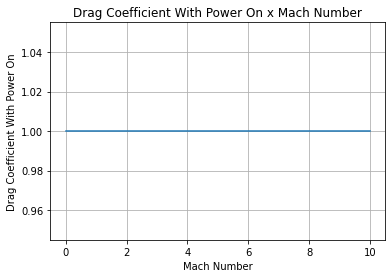

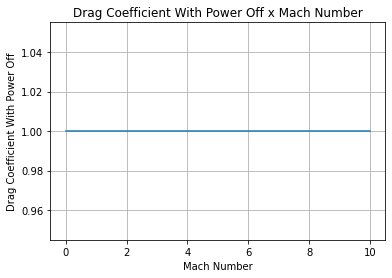

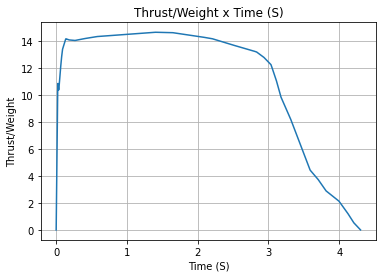

In [ ]:
NoseCone = Calisto.addNose(length=0.55829, kind="vonKarman", distanceToCM=0.71971)

FinSet = Calisto.addEllipticalFins(
    4, span=0.100, rootChord=0.120, distanceToCM=-1.04956
)

Tail = Calisto.addTail(
    topRadius=0.0635, bottomRadius=0.0435, length=0.060, distanceToCM=-1.194656
)
Calisto.allInfo()